In [1]:
import warnings
warnings.filterwarnings('ignore')

import os                   #  path 
import shutil              #copy the file from one folder to another
import glob                #pattern matching 

from skimage.io import imread   # to read the images

In [2]:
DATADIR=r'"C:\Users\DELL\Documents\webscraping_images"'
CLASS = ['Men Jeans', 'Sarees for women', 'Trouser for men']
TRAIN_DIR= "./DATASET"


In [4]:
for C in CLASS: 
    DEST = os.path.join(TRAIN_DIR, C)
    
    #if directory is not present then create one
    if not os.path.exists( DEST ):
        os.makedirs(DEST)
    #path=os.path.join(DATADIR,C)  #create path to use all the images.
    #for img in os.listdir(path):
     #   img_array= imread(os.path.join(path,img))
    
    for img_path in glob.glob(os.path.join(DATADIR, C )+"*"):
        SRC= img_path
        
        shutil.copy(SRC,DEST)

# Model Building

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras .preprocessing.image import ImageDataGenerator


In [6]:
base_model = InceptionV3(input_shape= (256,256,3), include_top= False)

In [7]:
for layer in base_model.layers:
    layer.trainable= False

In [8]:
X= Flatten()(base_model.output)
X= Dense(units=3, activation= 'sigmoid')(X)




# Final Model
model= Model(base_model.input, X)


#compile the model
model.compile(optimizer= 'adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 14, 14, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 14, 14, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 14, 14, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 14, 14, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 14, 14, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 14, 14, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 14, 14, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 6, 6, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 6, 6, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 6, 6, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

 # Pre-process data using DataGenerator 

In [9]:
train_datagen = ImageDataGenerator(featurewise_center= True, rotation_range= 0.4, 
                                   width_shift_range= 0.3,horizontal_flip= True,
                                   preprocessing_function= preprocess_input,
                                   zoom_range= 0.4, shear_range= 0.4)


train_data= train_datagen.flow_from_directory(directory= r"C:\Users\DELL\Documents\webscraping_images",
                                             target_size= (256,256),
                                             batch_size=36)

Found 744 images belonging to 3 classes.


In [10]:
train_data.class_indices

{'Men Jeans': 0, 'Sarees for women': 1, 'Trouser for men': 2}

# Visualizing the data

In [11]:
t_img, label = train_data.next()

In [12]:
# defining a function to plot the images
def plotImages(img_arr, label):
    """
    input: image array
    output: plot images
    """
    
    for idx , img in enumerate(img_arr):
        if idx <=10 :
            plt.figure(figsize= (5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


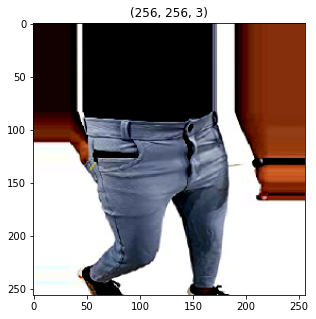

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


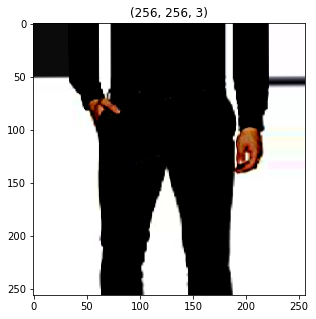

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


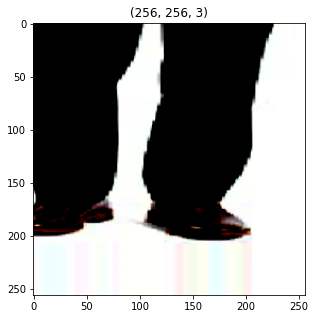

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


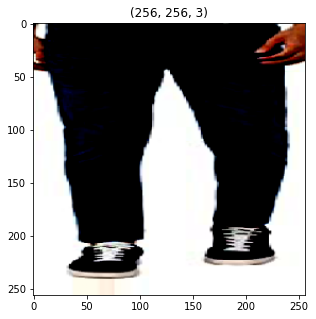

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


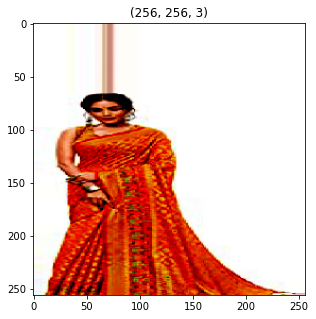

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


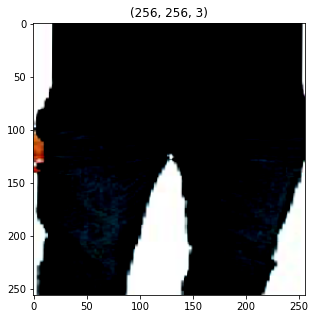

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


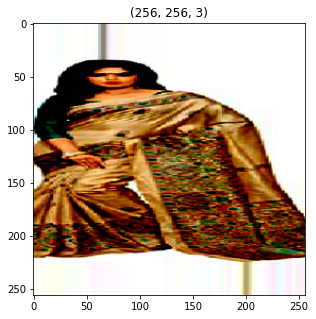

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


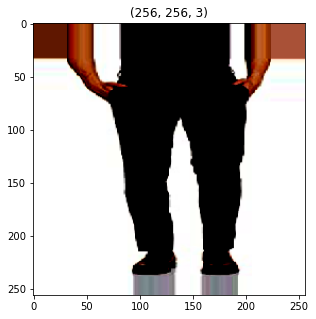

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


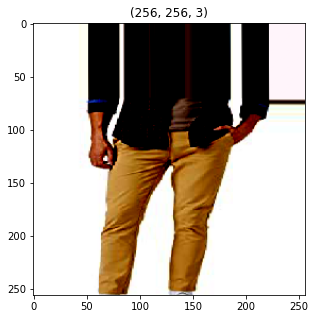

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


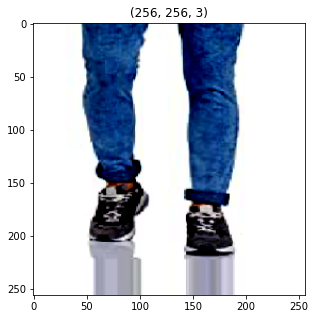

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


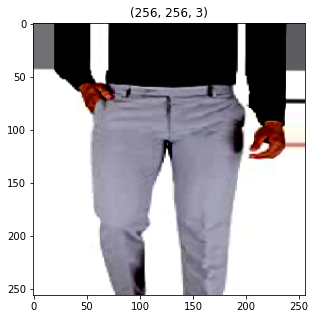

In [13]:
plotImages(t_img, label)

These are all pre processed image

# Model Check point

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# model checkpoint
mc= ModelCheckpoint(filepath= "./best_model.h5", 
                   monitor= "accuracy",
                   verbose= 1,
                   save_best_only= True)

#model early stopping
es= EarlyStopping(monitor= "accuracy",
                 min_delta = 0.01,
                 patience= 5,
                 verbose= 1)
#call backs
cb= [mc,es]

In [15]:
his = model.fit_generator(train_data, steps_per_epoch= 10, epochs= 30, callbacks= cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.5768 - accuracy: 0.7222
Epoch 1: accuracy improved from -inf to 0.72222, saving model to .\best_model.h5
10/10 [==============================] - 27s 2s/step - loss: 2.5768 - accuracy: 0.7222
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.1058 - accuracy: 0.8611
Epoch 2: accuracy improved from 0.72222 to 0.86111, saving model to .\best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 1.1058 - accuracy: 0.8611
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.8833
Epoch 3: accuracy improved from 0.86111 to 0.88333, saving model to .\best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.5439 - accuracy: 0.8833
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.8937
Epoch 4: accuracy improved from 0.88333 to 0.89368, saving model to .\best_model.h5
10/10 [=======================

Early stopping happens as we are not getting accuracy more that .94167, here best model is been saved, let's go ahead and chcek on our accuracy and loss trajectory.

In [16]:
# loading the best saved model.
from keras.models import load_model

model = load_model("best_model.h5")

In [17]:
# let's use history function  to plot
h= his.history
h.keys()

dict_keys(['loss', 'accuracy'])

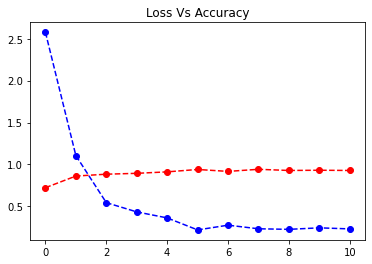

In [18]:
# ploting the history plot for each epochs loss nad accuracy results.
plt.plot(h['loss'], 'go--', c='blue')
plt.plot(h['accuracy'], 'go--', c='red')

plt.title("Loss Vs Accuracy")
plt.show()

From here we can see that with every epoch our loss value decreases every succesive epochs. We also see the increase in accuracy as well. Max accuracy is .94 and loss is .2


Our model is built and best model is already saved here. If we want we can see how the machine detect the model by defining a function and using tensorflow